<a href="https://colab.research.google.com/github/AmirahTech/Global-Air-Quality-Analysis/blob/main/global_air_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from google.colab import files

# Upload the CSV
uploaded = files.upload()  # choose CSV

# Load into DataFrame
df = pd.read_csv("global_air_quality_data_10000.csv")
df.head()


Saving global_air_quality_data_10000.csv to global_air_quality_data_10000 (2).csv


,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16


In [11]:
# Check missing values
print(df.isnull().sum())

# Drop rows with too many missing values or fill them
df.fillna(method='ffill', inplace=True)


City           0
Country        0
Date           0
PM2.5          0
PM10           0
NO2            0
SO2            0
CO             0
O3             0
Temperature    0
Humidity       0
Wind Speed     0
dtype: int64


/tmp/ipython-input-3756569441.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [12]:
# Convert 'Dtae' Column to datetime type for time series analysis
df['Date'] = pd.to_datetime(df['Date'])

#select only relevent columns for analysis
columns = ['Date', 'Country', 'City', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Temperature', 'Humidity', 'Wind Speed']
df = df[columns]

Dataset has complete data (no missing values).

Includes global data across countries, cities, pollutants, and weather info.

Ready for trend analysis, correlations, and visualization.

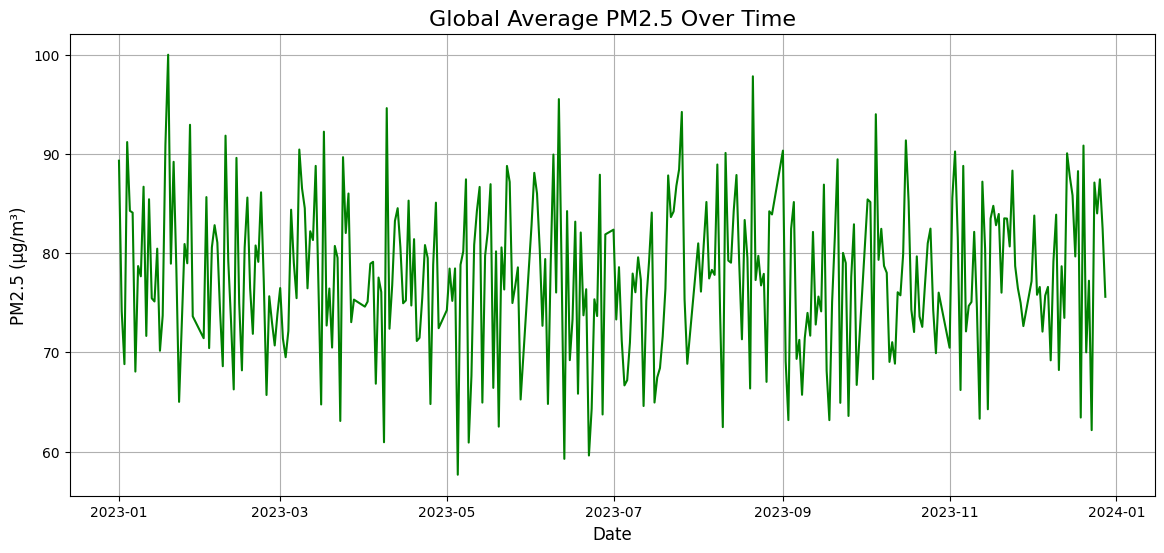

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Group data by date and calculate the global average PM2.5
global_pm25 = df.groupby('Date')['PM2.5'].mean()

# Plot the results
plt.figure(figsize=(14,6))
plt.plot(global_pm25.index, global_pm25.values, color='green')
plt.title('Global Average PM2.5 Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('PM2.5 (µg/m³)', fontsize=12)
plt.grid(True)
plt.show()


See how the average PM2.5 levels change over time globally. This gives insight into whether air quality is improving, worsening, or fluctuating seasonally.

PM2.5 is the main pollutant we track globally to assess air quality trends, hotspots, and correlations.

/tmp/ipython-input-1797535374.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



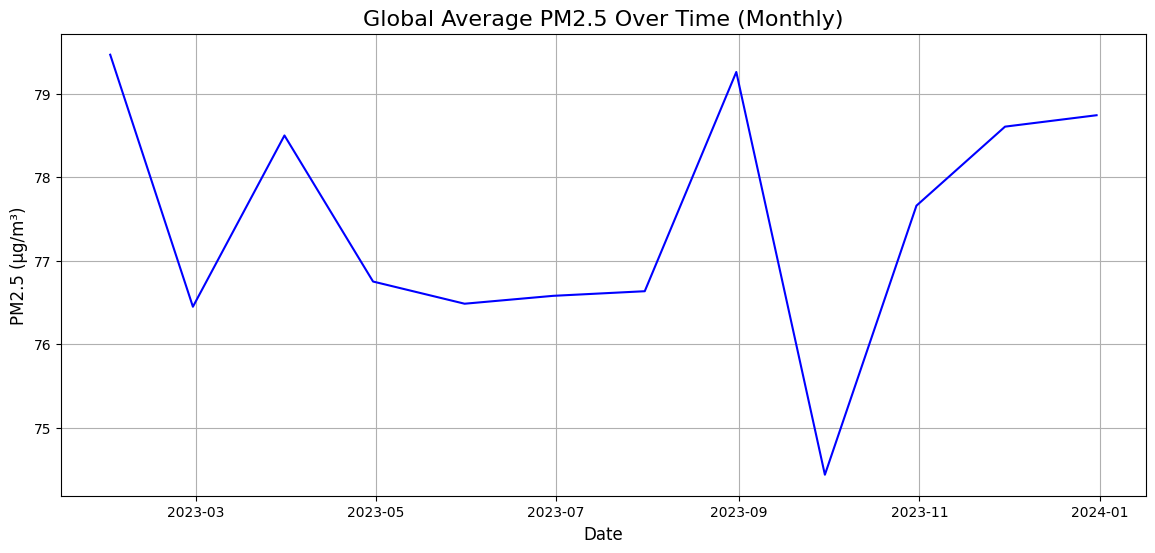

In [22]:
# Resample to monthly average for smoother trend
monthly_pm25 = df.set_index('Date').resample('M')['PM2.5'].mean()

plt.figure(figsize=(14,6))
plt.plot(monthly_pm25.index, monthly_pm25.values, color='blue')
plt.title('Global Average PM2.5 Over Time (Monthly)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('PM2.5 (µg/m³)', fontsize=12)
plt.grid(True)
plt.show()


Smoothing daily data into monthly averages removes short-term fluctuations, so the trend is easier to interpret.

Peaks indicate periods of higher pollution, which could be seasonal or due to specific global events (e.g., wildfires, industrial activity).

Dips show periods of lower pollution, possibly due to cleaner air conditions or effective local measures.

Overall, the graph shows long-term trends in global air quality, helping identify whether air pollution is improving or worsening over time.

/tmp/ipython-input-2308356560.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top20_pm25.values, y=top20_pm25.index, palette="Reds_r")


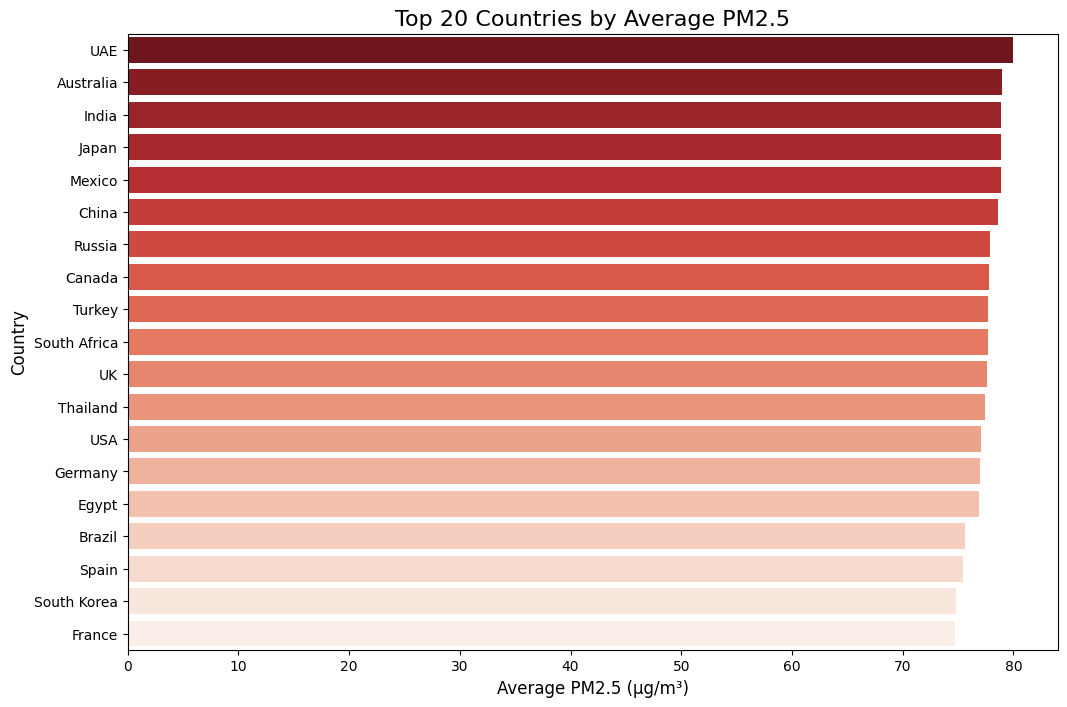

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average PM2.5 per country
avg_pm25_country = df.groupby('Country')['PM2.5'].mean().sort_values(ascending=False)

# Select top 20 most polluted countries
top20_pm25 = avg_pm25_country.head(20)

# Plot
plt.figure(figsize=(12,8))
sns.barplot(x=top20_pm25.values, y=top20_pm25.index, palette="Reds_r")
plt.title("Top 20 Countries by Average PM2.5", fontsize=16)
plt.xlabel("Average PM2.5 (µg/m³)", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.show()


Identify which countries have the highest average PM2.5 levels. This helps show regional differences in air quality.

These countries are typically highly industrialized, densely populated, or affected by regional pollution sources.

/tmp/ipython-input-3095095592.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top20_pm25_cities.values, y=top20_pm25_cities.index, palette="Reds_r")


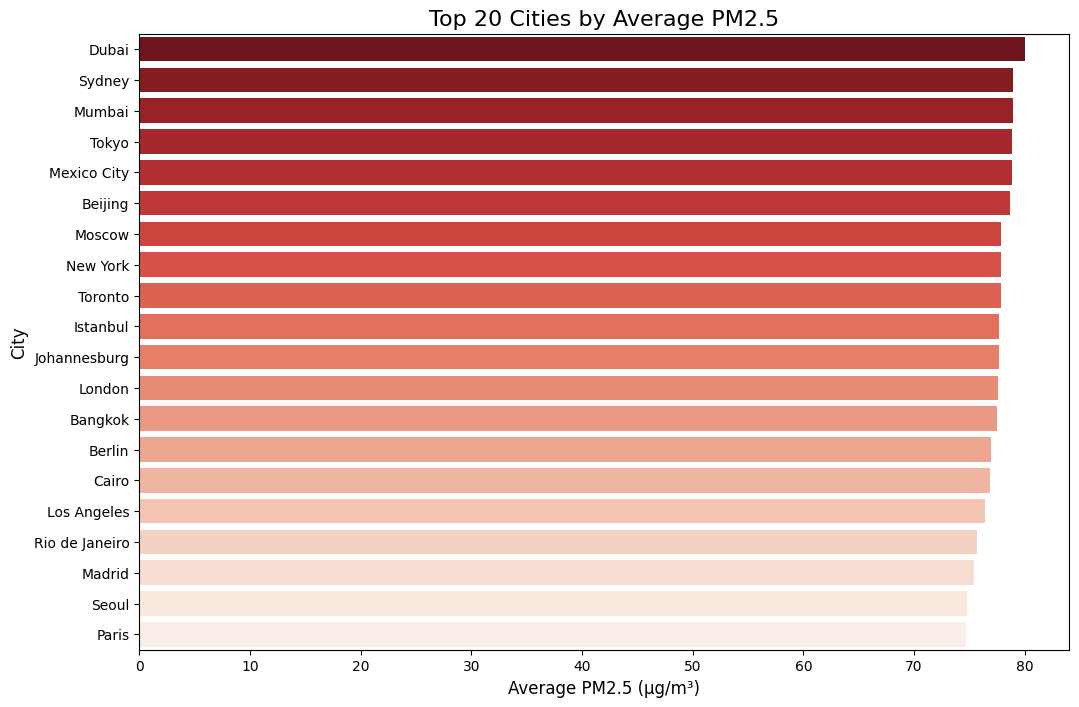

In [16]:
# Calculate average PM2.5 per city
avg_pm25_city = df.groupby('City')['PM2.5'].mean().sort_values(ascending=False)

# Select top 20 most polluted cities
top20_pm25_cities = avg_pm25_city.head(20)

# Plot
plt.figure(figsize=(12,8))
sns.barplot(x=top20_pm25_cities.values, y=top20_pm25_cities.index, palette="Reds_r")
plt.title("Top 20 Cities by Average PM2.5", fontsize=16)
plt.xlabel("Average PM2.5 (µg/m³)", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.show()


Identify the cities with the worst air quality. This is more granular than countries and can highlight pollution hotspots.

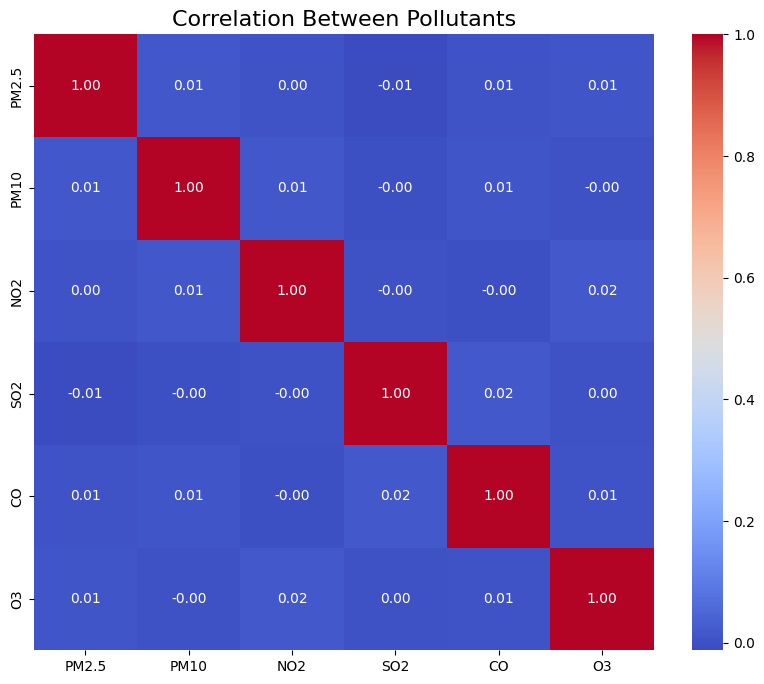

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only pollutant columns
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']

# Compute correlation matrix
corr_matrix = df[pollutants].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Pollutants", fontsize=16)
plt.show()


This analysis helps identify pollutants that commonly occur together, which is useful for understanding sources and managing air quality.


In [21]:
import plotly.express as px

# Calculate average PM2.5 per country
avg_pm25_country = df.groupby('Country')['PM2.5'].mean().reset_index()

# Create choropleth map
fig = px.choropleth(
    avg_pm25_country,
    locations="Country",
    locationmode='country names',
    color="PM2.5",
    color_continuous_scale="Reds",
    title="Average PM2.5 Levels by Country",
    labels={'PM2.5':'Avg PM2.5 (µg/m³)'}
)

fig.show()


Clearly identifies pollution hotspots globally.

Highlights differences between regions: some countries have much higher average PM2.5 than others.

Provides a visual, intuitive way to understand global air quality.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeu45j86e/8sa65v8s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeu45j86e/fbsacamv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45031', 'data', 'file=/tmp/tmpeu45j86e/8sa65v8s.json', 'init=/tmp/tmpeu45j86e/fbsacamv.json', 'output', 'file=/tmp/tmpeu45j86e/prophet_modelpkdqfu8n/prophet_model-20250823154912.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:49:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:49:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


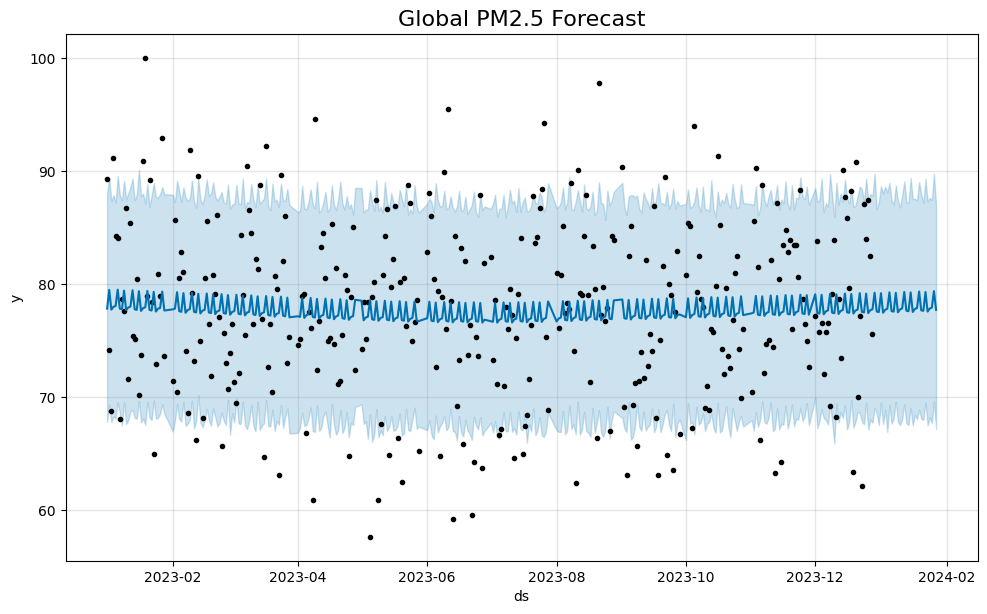

In [20]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data: Prophet needs columns 'ds' (date) and 'y' (value)
pm25_df = df.groupby('Date')['PM2.5'].mean().reset_index()
pm25_df.rename(columns={'Date':'ds', 'PM2.5':'y'}, inplace=True)

# Initialize Prophet model
model = Prophet()
model.fit(pm25_df)

# Create future dataframe (next 30 days)
future = model.make_future_dataframe(periods=30)

# Predict
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title("Global PM2.5 Forecast", fontsize=16)
plt.show()


Forecasting shows expected PM2.5 trends for the next month.

Helps anticipate periods of higher or lower pollution.

Useful for policymakers and environmental agencies to plan interventions.

Blue Line → Predicted PM2.5

Light Blue Shaded Area → Uncertainty ;Interval

Black Dots (or markers) → Observed Historical Values

**CONCLUSION**

This project analyzes global air quality, identifying the most polluted countries and cities, exploring relationships between pollutants, and visualizing trends over time. It also provides a forecast of PM2.5 levels, helping highlight pollution hotspots and anticipate future risks. Overall, it demonstrates how data analysis and visualization can reveal actionable insights into environmental health worldwide.

